<a href="https://colab.research.google.com/github/youngmoo/ECES-434/blob/main/Class%201.2%20(2021_01_13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ECES-434: Class 1.2 (2011-01-13)**
Hope you're as excited as I am to start doing some signal processing!

Let's start by importing the modules we'll be using throughout this notebook (these were introduced last class).

In [111]:
import numpy as np                # Load the NumPy module, using the abbreviation 'np'.
import matplotlib.pyplot as plt   # Load the Matplotlib module, abbreviated as 'plt'
import IPython.display as ipd     # Load the Interactive Python display module, abbreviated as 'ipd'
import librosa                    # Load the 'librosa' module for working with sound files and more

# ENTER YOUR USERNAME
username = 'anonymous'

# Define a variable that's the directory path to our shared Google Drive folder
GDrivePath = '/content/drive/MyDrive/ECES-434 Sessions/Class 1-2/'

# Let's make a signal
Start with an array of time samples $t$. I prefer using NumPy's *arange* (rather than *linspace*... you'll see why shortly):

In [24]:
fs = 22050
dur = 2

# Create an array of time samples: I like using 'arange' rather than linspace
t = np.arange(fs*dur) / fs

np.shape(t)
#np.size(t)
#len(t)


(44100,)

Colab will only show the last output of the block. If we want to display multiple results, use *print* statements.

In [25]:
print( np.shape(t) )
print( np.size(t) )
print( len(t) )

(44100,)
44100
44100


How do we show the last element of our array?

In [27]:
#t[ np.shape(t) ]
t[ len(t)-1 ]

1.999954648526077

## Really, don't use *linspace*
Here's why I __don't__ like *linspace*. Let's create a new array of time samples...

In [28]:
t2 = np.linspace(0,dur,2*fs)
print( len(t2) )
t2[ len(t2)-1 ]

44100


2.0

*Linspace* is **inclusive** of the endpoint, by default. So it gives us something that's not really not a sampling rate of 22050, it's a sampling rate of:

In [40]:
print( " t interval:", t[1]-t[0], " sampling rate:", 1/(t[1]-t[0]) )
print( "t2 interval:", t2[1]-t2[0], " sampling rate:", 1/(t2[1]-t2[0]) )

 t interval: 4.5351473922902495e-05  sampling rate: 22050.0
t2 interval: 4.5352502324315745e-05  sampling rate: 22049.5


## Come on, let's make a signal, already!
Sorry, one more thing... you access a range of elements in an array using brackets, colons, and commas:

In [43]:
print( t[0:4] )
print( t[1000:1004] )
print( t[ [1000, 1003] ])

[0.00000000e+00 4.53514739e-05 9.07029478e-05 1.36054422e-04]
[0.04535147 0.04539683 0.04544218 0.04548753]
[0.04535147 0.04548753]


OK, let's use the time array $t$ to make a sinusoid (like we did last class)...

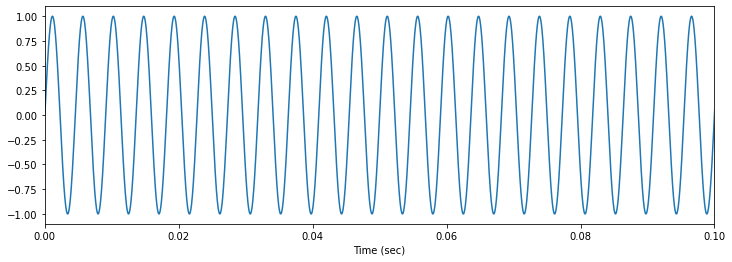

In [47]:
f0 = 220          # This is an A3 on the piano keyboard
A = 1.0

x = A * np.sin(2 * np.pi * f * t)

# Plot just the first 100 milliseconds of your signal
plt.figure(figsize = (12, 4))       # Set the size of our figure (in "inches")
plt.xlim(0,0.1)
plt.xlabel("Time (sec)")

plt.plot(t, x)
plt.show()
ipd.Audio(x,rate=fs)

# Scale
Let's make a musical scale! On a piano keyboard in modern tuning, each note is $2^{1/12} Hz$ above the previous note, meaning that every 12 notes (we call these 'half-steps'), we double the frequency.

In [135]:
f0 = 220          # This is an A3 on the piano keyboard
A = 0.25          # Let's decrease the volume
duration = 0.5

t = np.arange(fs*duration) / fs
notes = []        # An empty array, for now (we'll add the notes here)

for n in range(13):
    f_n = f0 * 2**(n/12)                    # The frequency of the next note
    x_n = A * np.sin(2 * np.pi * f_n * t)   # Generate the new note
    notes = np.append(notes, x_n)           # Add the new note, x_n, to the notes array

ipd.Audio(notes,rate=fs)

Do you hear something between the notes?

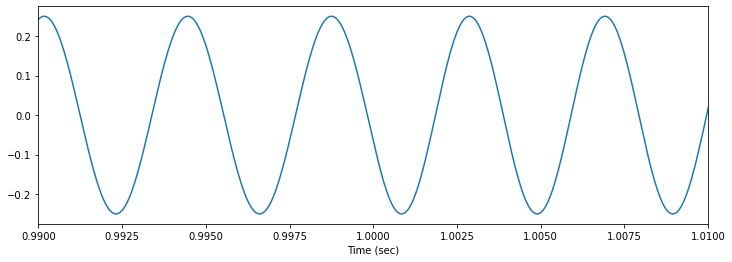

In [84]:
time = np.arange(len(notes)) / fs

plt.figure(figsize = (12, 4))
plt.xlim(0.99,1.01)
plt.xlabel("Time (sec)")

plt.plot(time, notes)
plt.show()

# Discontinuities are clicks
Even small ones are really annoying.

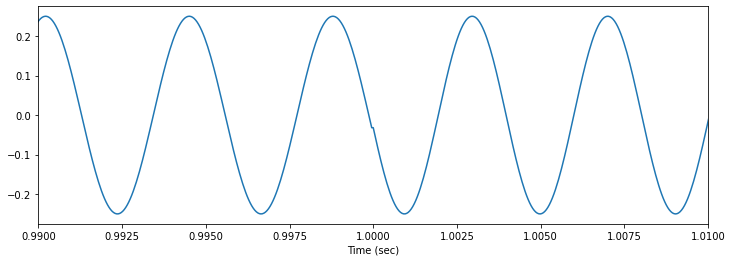

In [136]:
notes = []
t_step = int(duration * fs)
t_start = 0
t_end = t_step
phase = 0

for n in range(13):
    f_n = f0 * 2**(n/12)
    x_n = A * np.sin(2 * np.pi * f_n * t + phase)
    notes = np.append(notes, x_n)
    phase += 2 * np.pi * f_n * t[len(t)-1]
#    phase += 2 * np.pi * f_n * duration

# Zoom in on a note boundary
plt.figure(figsize = (12, 4))
plt.xlim(0.99,1.01)
plt.xlabel("Time (sec)")

plt.plot(time, notes)
plt.show()
ipd.Audio(notes,rate=fs)

How might we make a more musical scale?  Hint, a *major* scale starts with a note and then ascends 2,4,5,7,9, and 11 half-steps ($2^{1/12}$ intervals) from the starting note.

In [ ]:
note_n = [0,2,4,5,7,8,11,12]

# Harmonic series


In [137]:
f0 = 220
A = 0.25       # Let's decrease the volume
duration = 0.5

t = np.arange(fs*duration) / fs
f_series = []

for k in range(20):
    x_k = A * np.sin(2 * np.pi * f0*k * t)
    f_series = np.append(f_series, x_k)

ipd.Audio(f_series,rate=fs)

# A poor implementation of Fourier Series

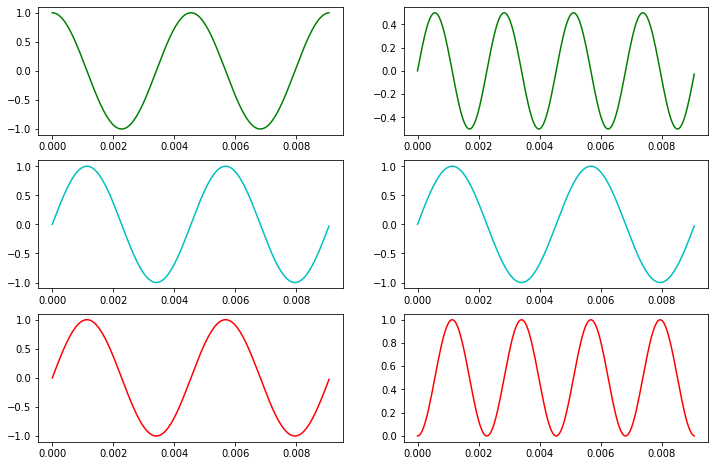

-0.00777393546385563
100.22725795734695


In [101]:
f0 = 220
fs = 22050
dur = 2

t = np.arange(2* fs / f0) / fs
x = np.sin(2*np.pi*f0*t)
sin_0 = np.sin(2*np.pi*f0*t)
cos_0 = np.cos(2*np.pi*f0*t)

plt.figure(figsize = (12, 8))
plt.subplot(321)
plt.plot(t,cos_0,'g')
plt.subplot(323)
plt.plot(t,x,'c')
plt.subplot(325)
plt.plot(t,sin_0,'r')

plt.subplot(322)
plt.plot(t,x*cos_0,'g')
plt.subplot(324)
plt.plot(t,x,'c')
plt.subplot(326)
plt.plot(t,x*sin_0,'r')
plt.show()

print(np.sum(x*cos_0))
print(np.sum(x*sin_0))

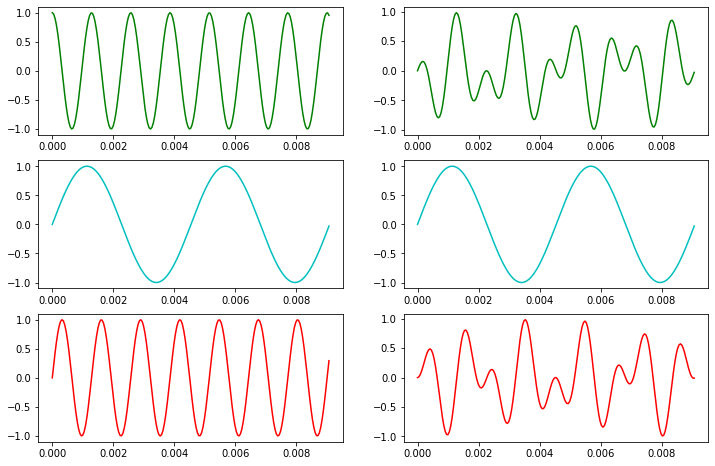

a: -0.11723345144361774
b: 0.5401488271743327
|c|: 0.5527245585598582


In [109]:
f0 = 220
fs = 22050
dur = 2

k = 10
#f_k = f0*k
f_k = 777

sin_k = np.sin(2*np.pi*f_k*t)
cos_k = np.cos(2*np.pi*f_k*t)

plt.figure(figsize = (12, 8))
plt.subplot(321)
plt.plot(t,cos_k,'g')
plt.subplot(323)
plt.plot(t,x,'c')
plt.subplot(325)
plt.plot(t,sin_k,'r')

plt.subplot(322)
plt.plot(t,x*cos_k,'g')
plt.subplot(324)
plt.plot(t,x,'c')
plt.subplot(326)
plt.plot(t,x*sin_k,'r')
plt.show()

a_k = np.sum(x*cos_k)
b_k = np.sum(x*sin_k)
print('a:', a_k)
print('b:', b_k)
print('|c|:', np.sqrt(a_k**2 + b_k**2)) 

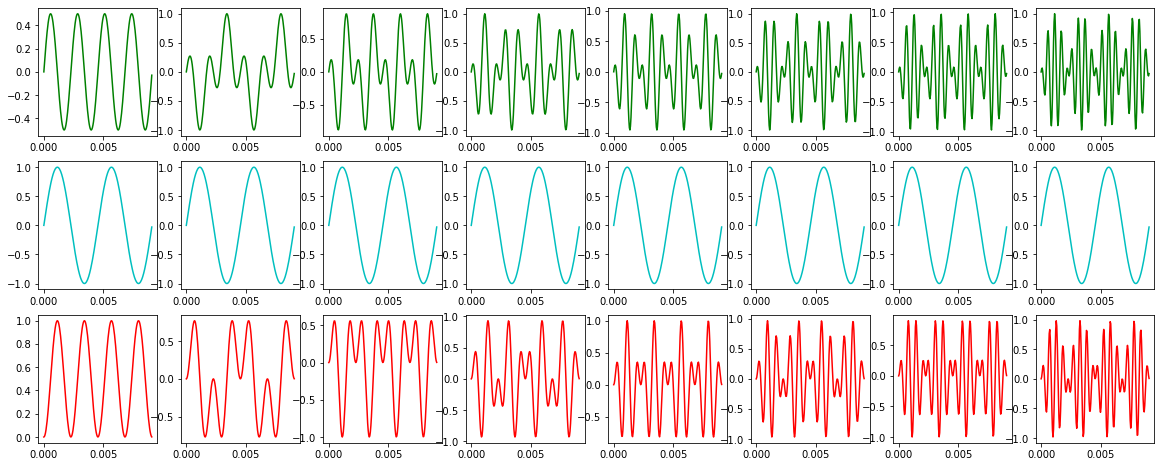

[1.00227258e+02 7.77967729e-03 7.78923614e-03 7.80264486e-03
 7.81992994e-03 7.84112560e-03 7.86627397e-03 7.89542526e-03]


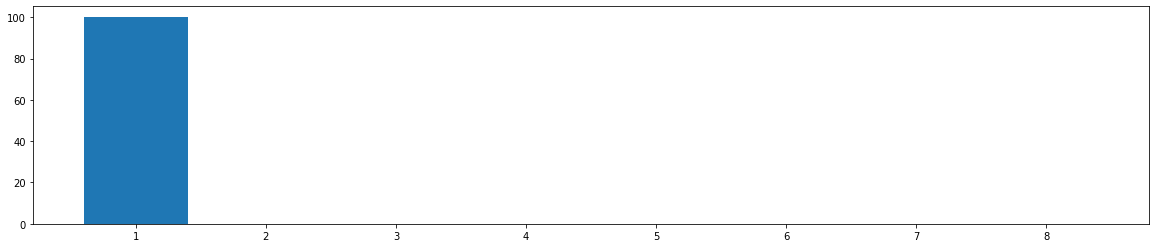

In [128]:
f0 = 220
fs = 22050
dur = 2

K = 8
#f_k = 777

c = np.zeros(K)

plt.figure(figsize = (20, 8))

for k in range(K):
  f_k = f0*(k+1)  # Remember, for loops start at 0, we want to start at 1
  sin_k = np.sin(2*np.pi*f_k*t)
  cos_k = np.cos(2*np.pi*f_k*t)

  plt.subplot(3,K,k+1)      # Subplots are indexed starting at 1, a la MATLAB ?!?!?
  plt.plot(t,x*cos_k,'g')
  plt.subplot(3,K,K+k+1)
  plt.plot(t,x,'c') #,t,cos_k,'g',t,sin_k,'r')
  plt.subplot(3,K,2*K+k+1)
  plt.plot(t,x*sin_k,'r')

  a_k = np.sum(x*cos_k)
  b_k = np.sum(x*sin_k)
  c[k] = np.sqrt(a_k**2 + b_k**2)

plt.show()
print(c)
#  print('exp:', np.abs( sum( x*np.exp(-1j*2*np.pi*f_k*t) ) ) )

plt.figure(figsize=(20,4))
plt.bar(np.arange(K)+1,c)
plt.show()

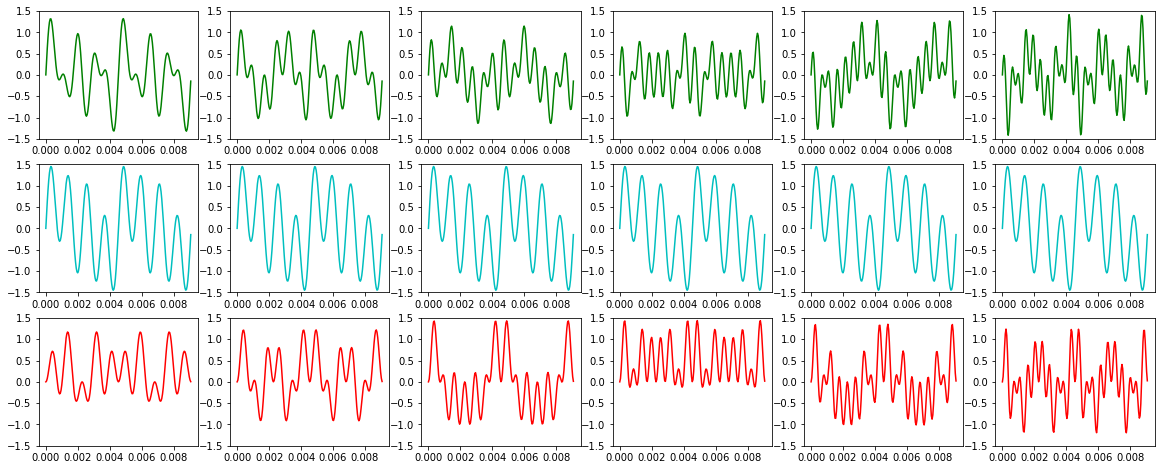

[5.01135760e+01 3.34089620e+01 4.02839239e-02 1.00226974e+02
 4.04431367e-02 4.05530835e-02]


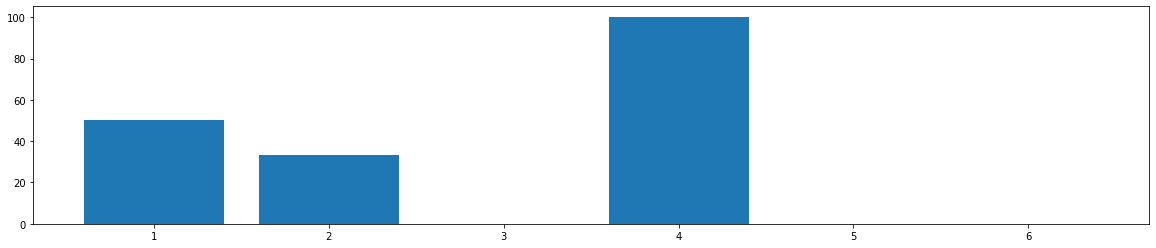

In [133]:
f0 = 220
fs = 22050
dur = 2

t = np.arange(2*fs/f0)/fs
x = 0.5*np.sin(2*np.pi* f0 *t) + 1/3*np.sin(2*np.pi* 2*f0 *t) + np.sin(2*np.pi* 4*f0 *t)

K = 6
#f_k = 777

c = np.zeros(K)

plt.figure(figsize = (20, 8))

for k in range(K):
  f_k = f0*(k+1)  # Remember, for loops start at 0, we want to start at 1
  sin_k = np.sin(2*np.pi*f_k*t)
  cos_k = np.cos(2*np.pi*f_k*t)

  plt.subplot(3,K,k+1)      # Subplots are indexed starting at 1, a la MATLAB ?!?!?
  plt.plot(t,x*cos_k,'g')
  plt.ylim(-1.5,1.5)
  plt.subplot(3,K,K+k+1)
  plt.plot(t,x,'c') #,t,cos_k,'g',t,sin_k,'r')
  plt.ylim(-1.5,1.5)
  plt.subplot(3,K,2*K+k+1)
  plt.plot(t,x*sin_k,'r')
  plt.ylim(-1.5,1.5)
  
  a_k = np.sum(x*cos_k)
  b_k = np.sum(x*sin_k)
  c[k] = np.sqrt(a_k**2 + b_k**2)

plt.show()
print(c)
#  print('exp:', np.abs( sum( x*np.exp(-1j*2*np.pi*f_k*t) ) ) )

plt.figure(figsize=(20,4))
plt.bar(np.arange(K)+1,c)
plt.show()

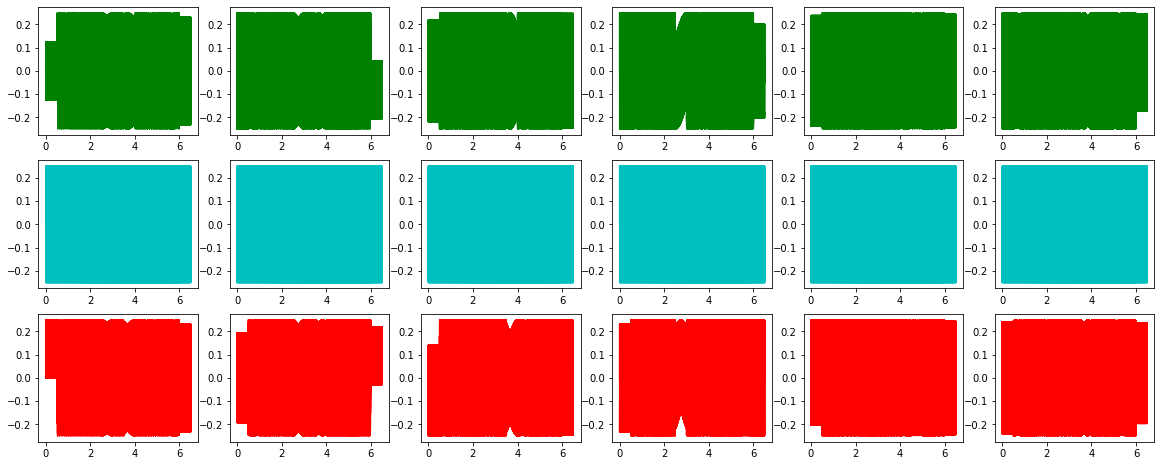

[1.37319945e+03 1.38929697e+03 1.81946789e+00 9.46884115e-01
 6.58934774e-01 5.12740761e-01]


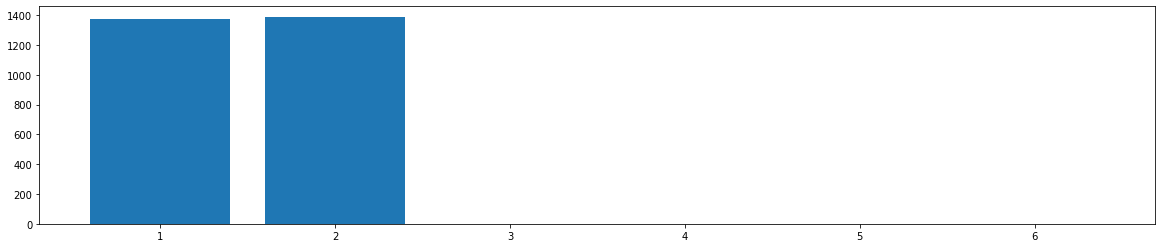

In [130]:
f0 = 220
fs = 22050
dur = 2
t = np.arange(len(notes)) / fs
x = notes

K = 6
#f_k = 777

c = np.zeros(K)

plt.figure(figsize = (20, 8))

for k in range(K):
  f_k = f0*(k+1)  # Remember, for loops start at 0, we want to start at 1
  sin_k = np.sin(2*np.pi*f_k*t)
  cos_k = np.cos(2*np.pi*f_k*t)

  plt.subplot(3,K,k+1)      # Subplots are indexed starting at 1, a la MATLAB ?!?!?
  plt.plot(t,x*cos_k,'g')
  plt.subplot(3,K,K+k+1)
  plt.plot(t,x,'c') #,t,cos_k,'g',t,sin_k,'r')
  plt.subplot(3,K,2*K+k+1)
  plt.plot(t,x*sin_k,'r')

  a_k = np.sum(x*cos_k)
  b_k = np.sum(x*sin_k)
  c[k] = np.sqrt(a_k**2 + b_k**2)

plt.show()
print(c)
#  print('exp:', np.abs( sum( x*np.exp(-1j*2*np.pi*f_k*t) ) ) )

plt.figure(figsize=(20,4))
plt.bar(np.arange(K)+1,c)
plt.show()